In [78]:
import tensorflow as tf
from tensorflow import keras

#from object_detection.utils import label_map_util
#from object_detection.utils import visualization_utils as viz_utils
#from object_detection.utils import ops as utils_ops

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [79]:
#PATH_TO_LABELS = '/home/henry/dev/tensorflow-playground/duplo-figures-detection/annotations/label_map.pbtxt'
#category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
#class_names = ['Figure']

In [80]:
train_images = keras.preprocessing.image_dataset_from_directory(
    directory='../images/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

test_images = keras.preprocessing.image_dataset_from_directory(
    directory='../images/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

Found 9 files belonging to 1 classes.
Found 1 files belonging to 1 classes.


In [81]:
image_batch, label_batch = next(iter(train_images))

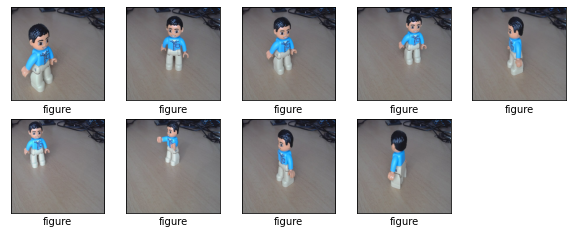

In [82]:
plt.figure(figsize=(10,10))
items=min(25, image_batch.shape[0])
for i in range(items):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    item=i
    plt.imshow(image_batch[item].numpy().astype("uint8"), cmap=plt.cm.binary)
    #plt.title(class_names[labels[i]])
    #print(class_names[label_batch[item].numpy().astype("uint8")[0]-1])
    plt.xlabel(class_names[label_batch[item].numpy().astype("uint8")[0]-1])
plt.show()

In [83]:
class_names = train_images.class_names 
class_names

['figure']

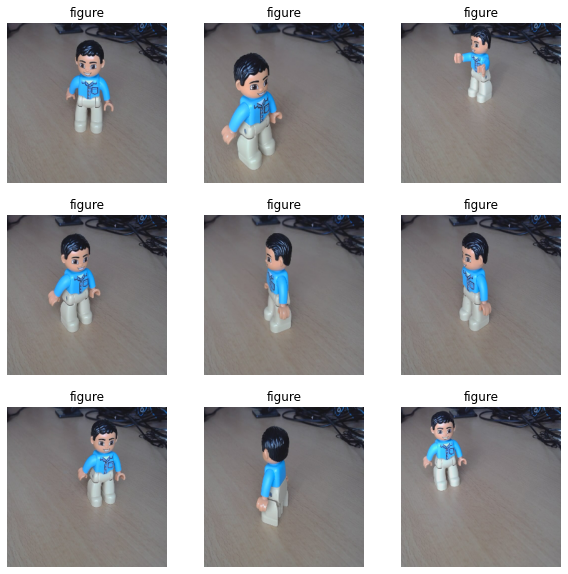

In [104]:
plt.figure(figsize=(10,10))
for images, labels in train_images.take(1):
  labels = labels - 1
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy().astype("uint8")[0]])
    plt.axis("off")